## Train and test set

- Training set: dataset used for trainning the model.
- Test set: dataset used to measure how well the model performs.

#### Why do we need it?
But why not just use the data from the training set to test the performance of our model?  The issue here is that our test would yield misleading results if we test our model with the training data.  The model itself was created by learning from the training set, so it will likely do quite well at making predictions on the training set itself- it knows this data too well.  We need to test the model with a test set, i.e. a dataset the model hasn’t seen before.

Training Sets and Test sets are the crux of machine learning.  In order to make any prediction, we need some original dataset that our model can learn from, and we need a test set to see how well the model actually does at making predictions.  Without a test set, there is no way to know whether or not our model overfits or underfits the training data- either scenario indicates that our model was not properly tuned to learn from the training data.

#### Points !!
- How appropriate is test_score? Actually, not very!. It highly depends on the sample that you take as test_set. 
- If you have a lot of setosa in your test_set, then probabily you will get high test_scores. And if you have alot versicolor, then you will get low test_scores.
- To handle this fluctuation in the scores are more significant when you have small dataset. Under such circumstances you can use Cross-Validation.
- For large datasets, these small randomness does not effect the scores much.
- Next important thing is your *test-set* should be representative of both training and production/deployment data. Else it could be really misleading.
- Not representative of training data. Example: data from 2013-2015 for training and test_set has data from 2018. No matter how hard you try you will not get good test_score. You cannot train a model on cats and dogs, and then as it to classify pandas or giraffe. Garbage in, Garbage out!
- Not representative of production/deployment data. Example: trained & tested on car front and deployed to detect cars from side. Garbage in, Garbage out!
- Test_score is the most important metric, its glues everything together (train,test, production). Alot of the decisions depends on test_score. So, our focus always is to get better test_scores.

[For more details on why split data into test and train set?](https://www.quora.com/In-machine-learning-what-s-the-purpose-of-splitting-data-up-into-test-sets-and-training-sets)

### Introduction to validation set

Creating your validation set is one of the most important things you can do in a machine learning practice. Very often people in industry say, they made an ML a model, and it worked in research conditions. Then the models failed miserably in production (aka real life with new unseen data), because they trained all their models on the entirety of their data. The model overfits (or “memorizes”) the current data, and doesn’t generalize to new data. Portioning off a validation set from your training data lets you understand how your model will work in the real world with novel data.

**Q:What is a validation set?**

You’re holding out data from the training data (the data where you know the answers to the problem statement) and never look at it until after you build your model and it’s ready to be evaluated. Never introduce this data for any training the model. For the model, it will be novel information it’s never seen before, so you can look at it predictions, but you also know the actual results. So you can compare each prediction vs the actual data point to assess model accuracy.

[Why splitting the data into train and test set is not enough?](https://stats.stackexchange.com/questions/168807/why-splitting-the-data-into-the-training-and-testing-set-is-not-enough)

[How and why to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)

In [1]:
import seaborn as sns
import pandas  as pd
import numpy as np

In [2]:
iris = sns.load_dataset('iris'); iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris.drop('species', axis=1)
y = iris.species

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [7]:
y_train.shape, y_test.shape

((112,), (38,))

In [8]:
from sklearn.svm import SVC

In [9]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

C:\Users\Computer World\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9910714285714286

In [10]:
svc.score(X_test, y_test) # score on complete test_set

0.9736842105263158

In [11]:
from sklearn.metrics import classification_report

In [12]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.92      0.96        12
   virginica       0.93      1.00      0.97        14

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [28]:
y_test[y_test == 'virginica']

136    virginica
134    virginica
120    virginica
105    virginica
115    virginica
113    virginica
143    virginica
139    virginica
106    virginica
124    virginica
145    virginica
128    virginica
126    virginica
148    virginica
129    virginica
Name: species, dtype: object

In [17]:
condition = y_test == 'virginica'

In [18]:
# highlighting how test score is not very reliable and 
# shows high variation depending on the samples present in test_set.
svc.score(X_test[condition], y_test[condition]) 

0.9333333333333333

## KNN

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer = load_breast_cancer()

In [32]:
X = cancer.data
y = cancer.target

In [33]:
X.shape

(569, 30)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9406593406593406

In [38]:
knn.score(X_test, y_test)

0.9473684210526315

Try Implementing your own Knn from scratch. It will be a good programming exercise, also will challenge your understanding of knn algorithm and numpy.

In [39]:
# our own distance formula
def dist(x,y):
    return np.sqrt(((x-y)**2).sum()) # euclidean distance
    return np.abs(x-y).sum() # manhattan dist

In [40]:
train_scores, test_scores = [], []
for k in range(1,41):
    m = KNeighborsClassifier(k)
    m.fit(X_train, y_train)
    train_scores.append(m.score(X_train, y_train))
    test_scores.append(m.score(X_test, y_test))

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

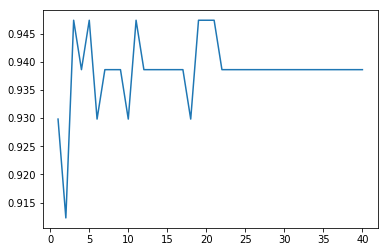

In [42]:
plt.plot(range(1,41), test_scores) # according to the plot K=4 is the best choice.

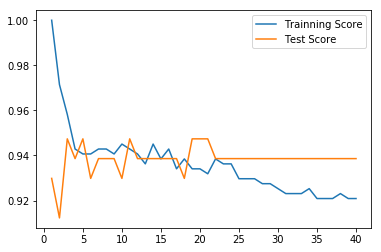

In [43]:
plt.plot(range(1,41), train_scores, label='Trainning Score')
plt.plot(range(1,41), test_scores, label='Test Score')
plt.legend()

In [51]:
def plot_classifier(model, features, labels):
    """Helper function to plot decision boundaries for classifier.
       Features are passed as dataframes and labels should be category names.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    h = .02  # step size in the mesh
    X = features[:, :2] # converting dataframe into numpy array
    y = labels#.astype('category').cat.codes.values
    
#     map_dict = {'setosa':0, 'versicolor':1, 'virginica':2}
#     y = np.array(list(map(lambda a: map_dict[a],list(y))))

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    model.fit(X,y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("{} classification".format(model))
    #plt.xlabel('sepal_length')
#     plt.ylabel('sepal_width')
    
# plot_classifier(KNeighborsClassifier(5), X, y)

In [ ]:
x = 

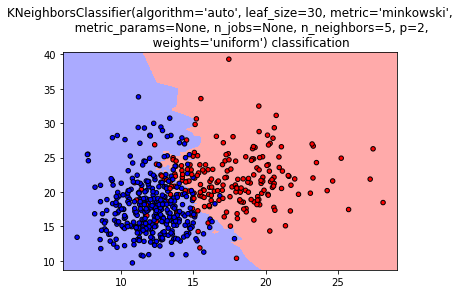

In [53]:
plot_classifier(KNeighborsClassifier(5), X, y)

## SVM

In [54]:
from sklearn.svm import SVC

In [55]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

C:\Users\Computer World\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [56]:
svc.score(X_test, y_test)

0.6491228070175439

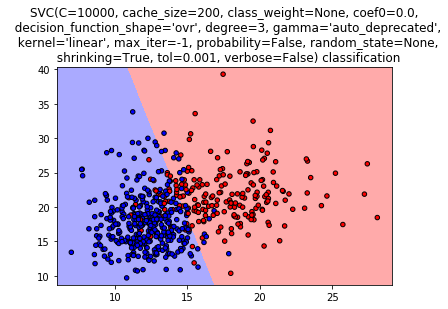

In [59]:
plot_classifier(SVC(kernel='linear', C= 10000),X,y)

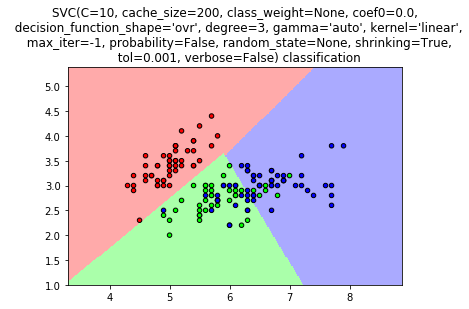

In [53]:
plot_classifier(SVC(kernel='linear', C= 10),X,y)

## Decesion Tree

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
iris = sns.load_dataset('iris')

In [62]:
x= iris.drop('species', axis=1)
y = iris.species

In [63]:
x_train, x_test = x[:120], x[120:]
y_train, y_test = y[:120], y[120:]

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
dt.score(x_train,y_train) # train_score

1.0

In [66]:
dt.score(x_test,y_test) # test_score

0.8

In [ ]:
plot_classifier(SVC(kernel='linear', C= 10),X,y)

In [67]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [68]:
import graphviz 
import os
from sklearn import tree
os.environ["PATH"] += os.pathsep + r'C:\Users\Computer World\Anaconda3\Library\bin\graphviz'

In [12]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=x.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

'C:\Users\Computer' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Tsvg']' returned non-zero exit status 1.

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(5, criterion='entropy' )

In [41]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
rf.score(x_train, y_train)

1.0

In [43]:
rf.score(x_test,y_test)

0.8333333333333334

All the sklearn models give you access to all the things that are learnt during the training. They are stored as attributes inside the model objects. Lets try exploring some of them.

In [53]:
rf.feature_importances_ 

array([0.06829923, 0.01869781, 0.16189409, 0.75110887])

In [55]:
import pandas as pd

In [57]:
pd.DataFrame({'features':x.columns, 'importance': rf.feature_importances_}) #making a dataframe out of feature_importance

,features,importance
0,sepal_length,0.068299
1,sepal_width,0.018698
2,petal_length,0.161894
3,petal_width,0.751109


In [44]:
rf.estimators_ # randomforest is just some decesion trees put together

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=961875063, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=254612594, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
            

In [60]:
predicts = []
for t in rf.estimators_:
    predicts.append(t.predict(x_test.iloc[0].values.reshape(1, -1)))

In [61]:
predicts # 2 is the index from the unique array in the next cell

[array([2.]), array([2.]), array([2.]), array([2.]), array([2.])]

In [68]:
y_train.unique() # 2 == virginica

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [67]:
rf.predict(x_test.iloc[0].values.reshape(1, -1))

array(['virginica'], dtype=object)

### Further reading
- Read [this](https://link.medium.com/VduQDJD2cU) for details on Machine Learning workflow. Here I have discussed in detail about all the best practices that you should follow when working on a machine learning project.
- [Hyperparameter tuning in random forest](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/)
- [encodings for random forest](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [One-hot encoding](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)
- [Understanding ensembles](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- [hyper-parameter tuning with parfit](https://medium.com/mlreview/parfit-hyper-parameter-optimization-77253e7e175e)
- [somemore blog](https://medium.com/usf-msds/intuitive-interpretation-of-random-forest-2238687cae45)